# Advance Project -3

## Importing Python libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
print ("Loading of required libraries is sucessful")

Loading of required libraries is sucessful


In [2]:
start = time.time()

## Importing the 50-Startups dataset

In [3]:
startups = pd.read_csv("50_Startups.csv")
print ("Dataset loading is sucessful")

Dataset loading is sucessful


## Preliminary data exploration

In [4]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startups.shape

(50, 5)

In [8]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Data preprocessing

#### Checking Null values in the dataset

In [9]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Checking duplicate values in the dataset

In [10]:
startups.duplicated().sum()

0

## Exploratory data analysis

#### Box plot for numerical variables to show the spread

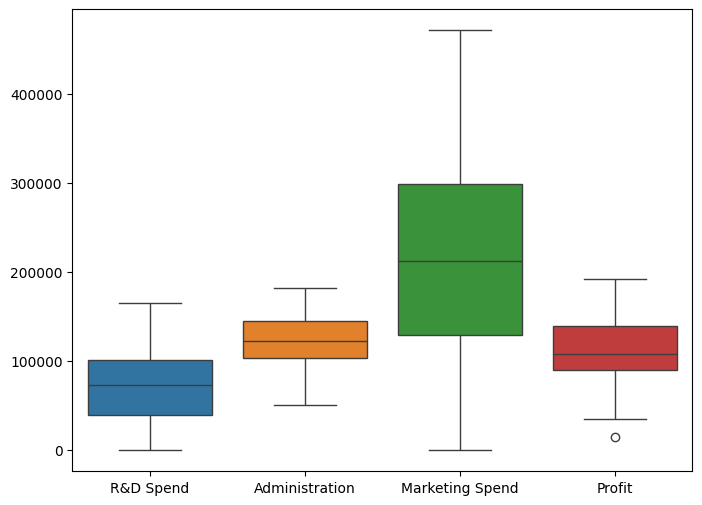

In [11]:
num_col = startups.select_dtypes (include = 'number')
plt.figure(figsize = (8,6))
sns.boxplot(data =num_col)
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/Box plot.png")
plt.show()

#### Profit across states

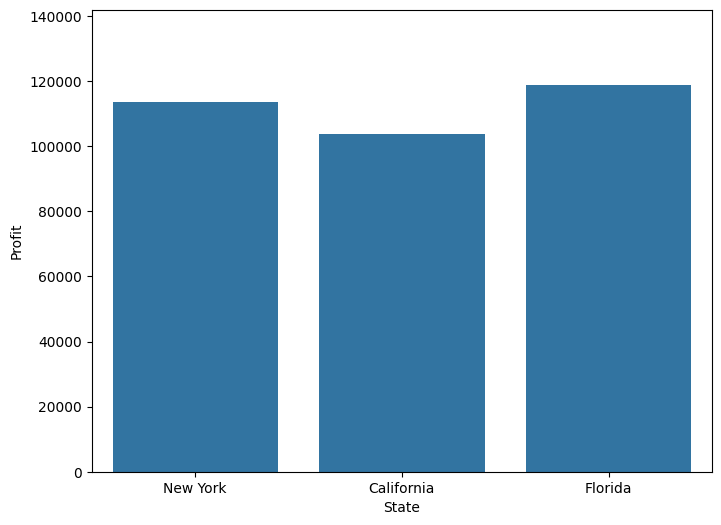

In [12]:
plt.figure(figsize = (8,6))
sns.barplot(data = startups, x = 'State', y = 'Profit', errwidth = 0)
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/Profit across states.png")
plt.show()

#### Relationships between R&D spend on profit across states

<Figure size 800x600 with 0 Axes>

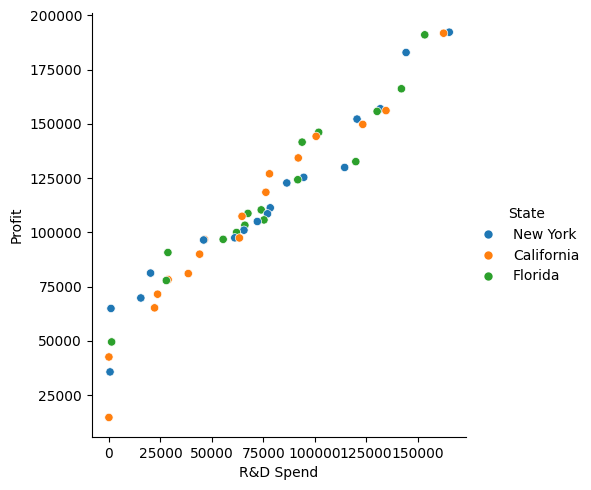

In [13]:
plt.figure(figsize = (8,6))
sns.relplot(data = startups, x = 'R&D Spend', y = 'Profit',hue = 'State', kind = 'scatter', legend='auto')
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/R&D vs Profit.png")
plt.show()

#### Relationship between marketing spend and Profit

<Figure size 1000x800 with 0 Axes>

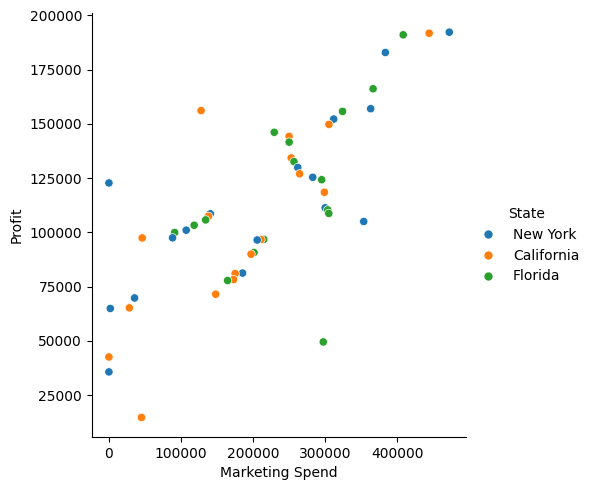

In [14]:
plt.figure(figsize = (10,8))
sns.relplot(data = startups, x = 'Marketing Spend', y = 'Profit', hue = 'State', kind = 'scatter')
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/Marketing Spend vs Profit.png")
plt.show()

#### Correlation heatmap

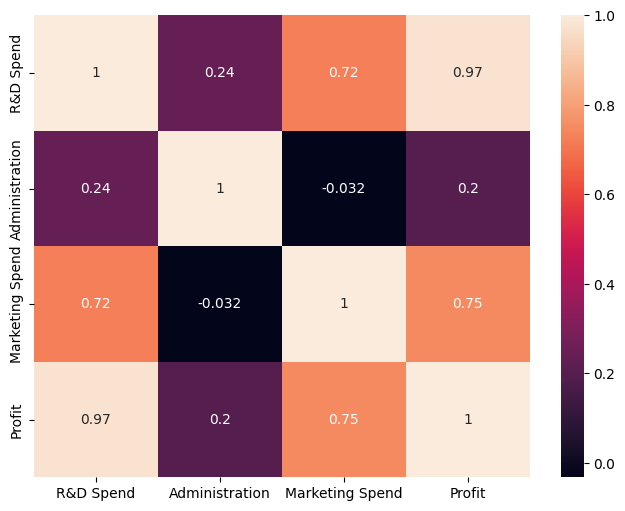

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(data = startups [['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr(), annot = True)
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/50 startups/Heatmap.png")
plt.show()

### Data Splitting

In [16]:
y = np.log(startups['Profit']).values

In [17]:
X = startups[['R&D Spend', 'Administration', 'Marketing Spend']].values
X_log = np.log(X + 1)

In [18]:
X_log.shape

(50, 3)

In [19]:
y

array([12.16661342, 12.16416704, 12.16029249, 12.11670571, 12.0208746 ,
       11.96394452, 11.9583963 , 11.95602413, 11.93302805, 11.91678902,
       11.89219683, 11.87936835, 11.8606592 , 11.80788611, 11.79511234,
       11.77465137, 11.75188669, 11.7390276 , 11.73018695, 11.71812384,
       11.68244906, 11.62010151, 11.6114328 , 11.59665972, 11.59498497,
       11.58435587, 11.56867743, 11.56179477, 11.54522207, 11.52292174,
       11.51230117, 11.48743903, 11.48686728, 11.48018448, 11.47950104,
       11.47708593, 11.41540293, 11.40699968, 11.30502834, 11.30227554,
       11.26753515, 11.26188167, 11.17743161, 11.15280144, 11.08521981,
       11.08100467, 10.80954106, 10.65866378, 10.48216087,  9.59433667])

### Model 1: 75-25% split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size = 0.25, random_state = 1234)

In [21]:
X_train.shape

(37, 3)

In [22]:
X_test.shape

(13, 3)

In [23]:
model1 = LinearRegression()

In [24]:
model1.fit(X_train, y_train)

LinearRegression()

In [25]:
coefficients = model1.coef_
coefficients

array([0.13394934, 0.35565596, 0.00133882])

In [26]:
intercept = model1.intercept_
intercept

5.983460411752984

In [27]:
model1_pred = model1.predict(X_test)

In [28]:
r2_score_model1 = r2_score(y_test, model1_pred)
print (f'The R-square value of the Model is: {r2_score_model1:.2f}')

mean_squared_error_model1 = mean_squared_error(y_test, model1_pred)
print (f'The RMSE of the model is : {np.sqrt(mean_squared_error_model1):.2f}')

The R-square value of the Model is: 0.82
The RMSE of the model is : 0.26


### Model 2: 70-30% split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [30]:
model2 = LinearRegression()

In [31]:
model2.fit(X_train, y_train)

LinearRegression()

In [32]:
Coefficients = model2.coef_
Coefficients

array([ 8.02516517e-06, -7.50403960e-07,  4.51586226e-07])

In [33]:
intercept = model2.intercept_
intercept

10.931080186765696

In [34]:
model2_pred = model2.predict(X_test)

In [35]:
r2_score_model2 = r2_score(y_test, model2_pred)
print (f'The R-square value of the Model is: {r2_score_model2:.2f}')

mean_squared_error_model2 = mean_squared_error(y_test, model2_pred)
print (f'The RMSE of the model is : {np.sqrt(mean_squared_error_model2):.2f}')

The R-square value of the Model is: 0.82
The RMSE of the model is : 0.17


### Model comparision

    Model  R2 Score
0  model1  0.821981
1  model2  0.824288


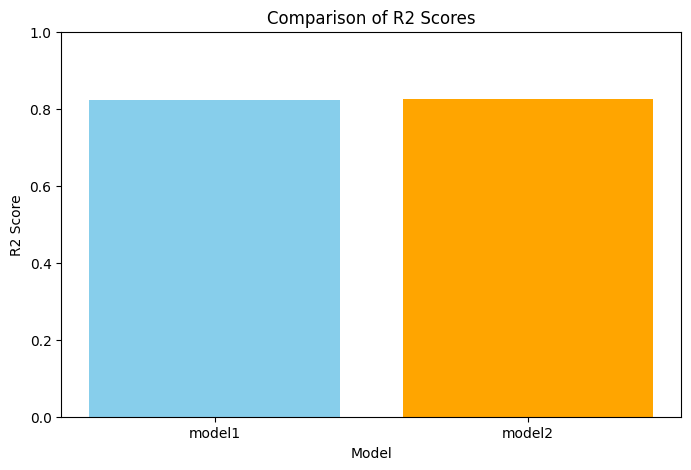

In [36]:
# Create a DataFrame for the R² scores
r2_scores = pd.DataFrame({'Model': ['model1', 'model2'], 'R2 Score': [r2_score_model1, r2_score_model2]})

# Print the table
print(r2_scores)

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(r2_scores['Model'], r2_scores['R2 Score'], color=['skyblue', 'orange'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores')
plt.ylim(0, 1)
plt.show()

In [37]:
end = time.time()

In [38]:
print(f"The time elapsed for execeution of the program is:  {(end-start)} seconds")

The time elapsed for execeution of the program is:  1.7971668243408203 seconds
